# Úkol č. 2 - regrese

* Termíny jsou uvedeny na [courses.fit.cvut.cz](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s regresní úlohou, s příznaky různých typů a s chybějícími hodnotami.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí délky dožití v různých zemích a letech.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:

* Year - Rok
* Status - Status rozvinuté nebo rozvojové země
* Life expectancy - Délka dožití v letech - **cílová proměnná, kterou budete predikovat**
* Adult Mortality - Úmrtnost dospělých bez ohledu na pohlaví (pravděpodobnost, že osoby, které dosáhly věku 15 let, zemřou před dosažením věku 60 let (uvedeno na 1 000 osob)).
* infant deaths - počet zemřelých kojenců na 1000 obyvatel
* Alcohol - Alkohol, zaznamenaná spotřeba na obyvatele (15+) (v litrech čistého alkoholu)
* percentage expenditure - Výdaje na zdravotnictví v procentech hrubého domácího produktu na obyvatele (%)
* Hepatitis B - pokrytí očkováním proti hepatitidě B (HepB) u dětí ve věku 1 roku (%)
* Measles - Spalničky - počet hlášených případů na 1000 obyvatel
* BMI - průměrný index tělesné hmotnosti celé populace
* under-five deaths - počet úmrtí dětí do pěti let na 1000 obyvatel
* Polio - proočkovanost proti dětské obrně (Pol3) u dětí ve věku 1 roku (%)
* Total expenditure - Výdaje vládních institucí na zdravotnictví jako procento celkových vládních výdajů (%)
* Diphtheria - pokrytí očkováním proti záškrtu, tetanu a černému kašli (DTP3) u jednoletých dětí (%)
* HIV/AIDS - počet úmrtí na 1 000 živě narozených dětí na HIV/AIDS (0-4 roky)
* GDP - hrubý domácí produkt na obyvatele (v USD)
* Population - počet obyvatel země
* thinness 1-19 years - podíl dětí ve věku 10-19 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* thinness 5-9 years - podíl dětí ve věku 5-9 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* Income composition of resources - Index lidského rozvoje z hlediska příjmového složení zdrojů (index v rozmezí 0 až 1)
* Schooling - počet let školní docházky (roky)


## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném regresním modelu.
    * Nějakým způsobem se vypořádejte s chybějícími hodnotami. _Pozor na metodické chyby!_
    * Můžete využívat i vizualizace. Vše stručně ale náležitě komentujte.
<br /><br />
  * Vytvořte **vlastní implementaci náhodného lesa**. Použijte k tomu níže předpřipravenou kostru.
  
  * Na připravená data postupně aplikujte Vaši předchozí implementaci modelu náhodného lesa, dále jeden z modelů **lineární regrese** nebo **hřebenové regrese**, a alespoň jeden další model podle Vašeho uvážení, přičemž pro každý z těchto modelů přiměřeně:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Experimentujte s normalizací (standardizace/min-max), pokud pro daný model očekáváte její příznivý vliv.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty (vzhledem k RMSE).
    * Pro model s nejlepšími hodnotami hyperparametrů určete jeho chybu pomocí RMSE a MAE. _Pozor na metodické chyby!_
    * Získané výsledky vždy řádně okomentujte.
<br /><br />
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model a odhadněte, jakou chybu (RMSE) můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru `evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tato data. Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte s využitím tří sloupců: **Country**, **Year** a **Life expectancy**. Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

  * Ukázka prvních řádků souboru `results.csv`:
  
```
Country,Year,Life expectancy
Peru,2012,71.4
Peru,2013,72.6
...
```


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.

In [76]:
# import the required libs
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.utils import resample
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
%matplotlib inline

# Data reading and Preprocessing

In [77]:
data = pd.read_csv("data.csv")
eval = pd.read_csv("evaluation.csv")

In [78]:
display(data.shape)
display(data.head())
display(data.info())
display(data.describe())
display(data.nunique())

(2718, 22)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2718 non-null   object 
 1   Year                             2718 non-null   int64  
 2   Status                           2718 non-null   object 
 3   Life expectancy                  2718 non-null   float64
 4   Adult Mortality                  2718 non-null   float64
 5   infant deaths                    2718 non-null   int64  
 6   Alcohol                          2564 non-null   float64
 7   percentage expenditure           2718 non-null   float64
 8   Hepatitis B                      2188 non-null   float64
 9   Measles                          2718 non-null   int64  
 10  BMI                              2692 non-null   float64
 11  under-five deaths                2718 non-null   int64  
 12  Polio               

None

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2718.000000,2718.000000,2718.000000,2718.000000,2564.000000,2718.000000,2188.000000,2718.000000,2692.000000,2718.000000,2700.000000,2529.000000,2700.000000,2718.000000,2317.000000,2.116000e+03,2692.000000,2692.000000,2576.000000,2576.000000
mean,2007.113687,69.204525,164.432303,30.825239,4.672512,757.071658,80.884826,2370.999632,38.314339,42.767476,82.528148,5.943606,82.135926,1.788263,7646.459541,1.261063e+07,4.892236,4.925149,0.626697,11.996079
std,4.537979,9.612530,125.512789,121.786599,4.051664,2007.472092,25.010075,11174.241799,19.954800,165.704415,23.294376,2.488801,23.849574,5.221587,14455.594394,6.238395e+07,4.434584,4.522269,0.213323,3.364109
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.100000,73.250000,0.000000,0.990000,5.832385,77.000000,0.000000,19.200000,0.000000,77.000000,4.260000,78.000000,0.100000,459.291200,1.829220e+05,1.600000,1.600000,0.492000,10.100000
50%,2007.000000,72.200000,142.000000,3.000000,3.820000,67.687008,92.000000,18.000000,43.450000,4.000000,93.000000,5.730000,93.000000,0.100000,1741.142552,1.365022e+06,3.400000,3.400000,0.679000,12.300000
75%,2011.000000,75.800000,227.000000,22.000000,7.832500,446.887709,97.000000,372.000000,56.100000,28.000000,97.000000,7.530000,97.000000,0.800000,6337.882993,7.383590e+06,7.200000,7.300000,0.781000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.938000,20.700000


Country                             183
Year                                 16
Status                                2
Life expectancy                     359
Adult Mortality                     423
infant deaths                       195
Alcohol                            1055
percentage expenditure             2185
Hepatitis B                          87
Measles                             909
BMI                                 600
under-five deaths                   239
Polio                                73
Total expenditure                   792
Diphtheria                           81
HIV/AIDS                            197
GDP                                2317
Population                         2110
thinness  1-19 years                194
thinness 5-9 years                  200
Income composition of resources     613
Schooling                           173
dtype: int64

In [79]:
display(eval.shape)
display(eval.head())
display(eval.info())
display(eval.describe())
display(eval.nunique())

(210, 21)

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Azerbaijan,2015,Developing,118.0,5,NaN,0.000000,96.0,0,52.5,...,98.0,NaN,96.0,0.1,55.313820,9649341.0,2.8,2.9,0.758,12.7
1,Azerbaijan,2014,Developing,119.0,5,0.01,306.182431,94.0,0,51.5,...,97.0,6.40,94.0,0.1,7891.299776,953579.0,2.8,2.9,0.752,12.2
2,Azerbaijan,2013,Developing,121.0,5,2.14,275.651493,93.0,164,5.6,...,96.0,5.54,93.0,0.1,7875.756953,941681.0,2.8,2.8,0.745,11.9
3,Azerbaijan,2012,Developing,123.0,5,0.01,285.610391,88.0,0,49.7,...,92.0,5.37,89.0,0.1,7496.335728,9295784.0,2.8,2.8,0.742,11.8
4,Azerbaijan,2011,Developing,125.0,5,1.98,263.142699,84.0,0,48.8,...,91.0,5.10,87.0,0.1,7189.691229,917382.0,2.8,2.9,0.741,11.7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          210 non-null    object 
 1   Year                             210 non-null    int64  
 2   Status                           210 non-null    object 
 3   Adult Mortality                  210 non-null    float64
 4   infant deaths                    210 non-null    int64  
 5   Alcohol                          171 non-null    float64
 6   percentage expenditure           210 non-null    float64
 7   Hepatitis B                      187 non-null    float64
 8   Measles                          210 non-null    int64  
 9   BMI                              204 non-null    float64
 10  under-five deaths                210 non-null    int64  
 11  Polio                            209 non-null    float64
 12  Total expenditure     

None

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,210.000000,210.000000,210.000000,171.000000,210.000000,187.000000,210.000000,204.000000,210.000000,209.000000,173.000000,209.000000,210.000000,168.000000,1.680000e+02,204.000000,204.000000,192.000000,192.000000
mean,2012.500000,169.509524,25.000000,3.750351,523.522205,81.850267,3163.738095,37.193627,34.566667,82.808612,5.733642,84.717703,1.222857,5394.445722,1.470315e+07,4.301471,4.304412,0.637104,12.047396
std,1.711906,107.397319,50.336285,3.948600,1752.735248,25.165026,14960.034712,20.042681,68.211168,25.000610,2.399384,21.686173,2.731186,11461.342372,4.048977e+07,4.207060,4.308261,0.176720,3.107463
min,2010.000000,2.000000,0.000000,0.010000,0.000000,4.000000,0.000000,2.000000,0.000000,4.000000,1.170000,6.000000,0.100000,29.652622,1.287000e+03,0.500000,0.400000,0.000000,0.000000
25%,2011.000000,76.250000,0.000000,0.080000,0.000000,81.500000,0.000000,19.750000,1.000000,84.000000,4.330000,85.000000,0.100000,544.314675,5.614675e+05,1.300000,1.300000,0.505750,10.300000
50%,2012.500000,178.000000,3.000000,2.140000,47.736562,91.000000,3.500000,37.350000,5.000000,92.000000,5.790000,92.000000,0.200000,2671.754503,1.741556e+06,2.100000,2.000000,0.662000,12.300000
75%,2014.000000,234.750000,26.000000,6.585000,391.338838,97.000000,228.750000,56.175000,38.000000,97.000000,6.880000,96.000000,0.850000,4572.900523,1.027256e+07,6.800000,6.625000,0.741250,13.825000
max,2015.000000,462.000000,239.000000,12.710000,15268.064450,99.000000,133802.000000,67.000000,321.000000,99.000000,12.600000,99.000000,21.600000,87646.753460,2.581621e+08,16.700000,17.300000,0.948000,17.700000


Country                             35
Year                                 6
Status                               2
Adult Mortality                    149
infant deaths                       55
Alcohol                            118
percentage expenditure             139
Hepatitis B                         39
Measles                             98
BMI                                163
under-five deaths                   66
Polio                               39
Total expenditure                  158
Diphtheria                          38
HIV/AIDS                            44
GDP                                168
Population                         168
thinness  1-19 years                65
thinness 5-9 years                  66
Income composition of resources    167
Schooling                           76
dtype: int64

 - basic statistics on data, no comments required

In [80]:
# Convert the 'Status' column to a numeric Dtype
data['Status'] = data['Status'].astype('category').cat.codes
eval['Status'] = eval['Status'].astype('category').cat.codes

In [81]:
display(data.head())
display(data.info())

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2718 non-null   object 
 1   Year                             2718 non-null   int64  
 2   Status                           2718 non-null   int8   
 3   Life expectancy                  2718 non-null   float64
 4   Adult Mortality                  2718 non-null   float64
 5   infant deaths                    2718 non-null   int64  
 6   Alcohol                          2564 non-null   float64
 7   percentage expenditure           2718 non-null   float64
 8   Hepatitis B                      2188 non-null   float64
 9   Measles                          2718 non-null   int64  
 10  BMI                              2692 non-null   float64
 11  under-five deaths                2718 non-null   int64  
 12  Polio               

None

In [82]:
display(eval.head())
display(eval.info())

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Azerbaijan,2015,1,118.0,5,NaN,0.000000,96.0,0,52.5,...,98.0,NaN,96.0,0.1,55.313820,9649341.0,2.8,2.9,0.758,12.7
1,Azerbaijan,2014,1,119.0,5,0.01,306.182431,94.0,0,51.5,...,97.0,6.40,94.0,0.1,7891.299776,953579.0,2.8,2.9,0.752,12.2
2,Azerbaijan,2013,1,121.0,5,2.14,275.651493,93.0,164,5.6,...,96.0,5.54,93.0,0.1,7875.756953,941681.0,2.8,2.8,0.745,11.9
3,Azerbaijan,2012,1,123.0,5,0.01,285.610391,88.0,0,49.7,...,92.0,5.37,89.0,0.1,7496.335728,9295784.0,2.8,2.8,0.742,11.8
4,Azerbaijan,2011,1,125.0,5,1.98,263.142699,84.0,0,48.8,...,91.0,5.10,87.0,0.1,7189.691229,917382.0,2.8,2.9,0.741,11.7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          210 non-null    object 
 1   Year                             210 non-null    int64  
 2   Status                           210 non-null    int8   
 3   Adult Mortality                  210 non-null    float64
 4   infant deaths                    210 non-null    int64  
 5   Alcohol                          171 non-null    float64
 6   percentage expenditure           210 non-null    float64
 7   Hepatitis B                      187 non-null    float64
 8   Measles                          210 non-null    int64  
 9   BMI                              204 non-null    float64
 10  under-five deaths                210 non-null    int64  
 11  Polio                            209 non-null    float64
 12  Total expenditure     

None

## Data fixing

In [83]:
# unique country-status couples
unique_country_status = data[['Country', 'Status']].drop_duplicates()
pd.set_option('display.max_rows', None)

display(unique_country_status)

,Country,Status
0,Afghanistan,1
16,Albania,1
32,Algeria,1
48,Angola,1
64,Antigua and Barbuda,1
80,Argentina,1
96,Armenia,1
112,Australia,0
128,Austria,0
144,Azerbaijan,1


In [84]:
unique_country_status = eval[['Country', 'Status']].drop_duplicates()

display(unique_country_status)

,Country,Status
0,Azerbaijan,1
6,Belgium,0
12,Belize,1
18,Bhutan,1
24,Bolivia (Plurinational State of),1
30,Bulgaria,0
36,Canada,1
42,Colombia,1
48,Czechia,0
54,Democratic Republic of the Congo,1


 - I noticed errors in the data related to country status, I manually went through the data and found countries that had the wrong status. I decided to correct this obvious error

In [85]:
# countries whose status needs to be corrected
countries_to_fix = ['Estonia', 'Canada', 'Finland', 'France', 'Greece', 'Israel']

# '1' means 'Developing' and '0' - 'Developed'
data.loc[data['Country'].isin(countries_to_fix), 'Status'] = 0
eval.loc[data['Country'].isin(countries_to_fix), 'Status'] = 0
# Country statuses manually corrected based on information from Wikipedia - https://en.wikipedia.org/wiki/Developed_country


In [86]:
# Thresholds for determining implausible values
thresholds = {
    'infant deaths': 1000,  # Maximum allowable value per 1,000 births
    'percentage expenditure': 100, # Maximum value in per cent
    'Hepatitis B': 100,
    'Measles': 100,
    'under-five deaths': 1000,
    'Polio': 100,
    'Total expenditure': 100,
    'Diphtheria': 100,
    'HIV/AIDS': 1000,
    'thinness  1-19 years': 100,
    'thinness 5-9 years': 100,
    
}

# Replace implausible values with NaN
for column, max_value in thresholds.items():
    data.loc[data[column] > max_value, column] = np.nan
    eval.loc[eval[column] > max_value, column] = np.nan

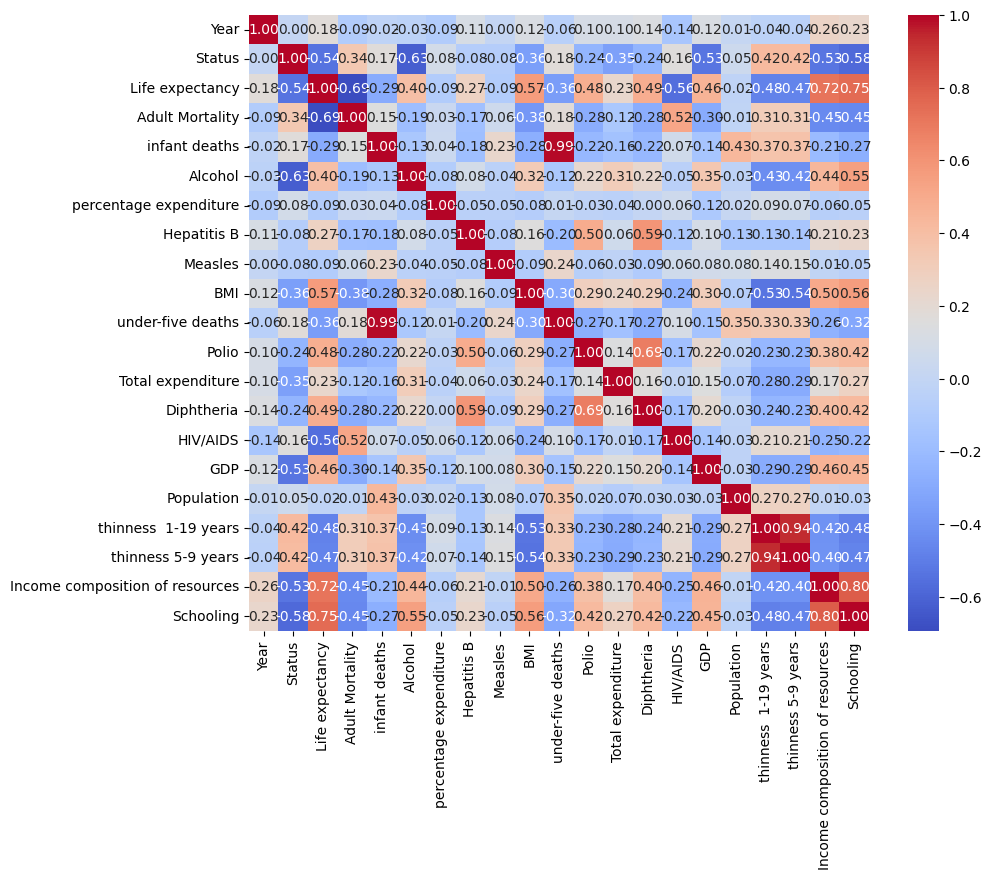

In [87]:
corr_matrix = data.drop('Country', axis=1).corr()

# Visualisation using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

 - The correlation matrix shows that the population has almost no effect on the predicted life expectancy (value -0.02). In addition, this column contains a lot of errors, the population within the country changes every year by dozens of times. Due to the difficulty of correcting this data, I will delete this column.

In [88]:
data = data.drop('Population', axis=1)
eval = eval.drop('Population', axis=1)

##  Data splitting

First, we divide the dataset into the target variable we want to predict and the attribute matrix from which we will predict.In our case, the target variable is Life expectancy

In [89]:
Xdata = data.drop('Life expectancy', axis=1)
ydata = data['Life expectancy']

In [90]:
rd_seed = 356 # data is distributed randomly, but it is good to have a fixed random seed in testing
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.4, random_state=rd_seed) 
display(Xtrain.shape)
display(ytrain.shape)
display(Xtest.shape)
display(ytest.shape)

(1630, 20)

(1630,)

(1088, 20)

(1088,)

In [91]:
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state=rd_seed) 
display(Xval.shape)
display(yval.shape)
display(Xtest.shape)
display(ytest.shape)

(544, 20)

(544,)

(544, 20)

(544,)

## NULL values

In [92]:
# Finding columns with missing values
columns_with_missing_values = data.columns[data.isnull().any()].tolist()
columns_with_missing_values

['infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'GDP',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [93]:
columns_with_missing_values2 = eval.columns[eval.isnull().any()].tolist()
columns_with_missing_values2

['Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'GDP',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [94]:
set(columns_with_missing_values) - set(columns_with_missing_values2)

{'infant deaths', 'under-five deaths'}

In [95]:
set(columns_with_missing_values2) - set(columns_with_missing_values)

set()

- now datasets have not the same columns with missing values

In [96]:
# create a dictionary of median values
overall_median = {col: Xtrain[col].median() for col in columns_with_missing_values}

In [97]:
# calculation of medians for each country
country_medians = Xtrain.groupby('Country')[columns_with_missing_values].median()

In [98]:
# function for filling missing values
def fill_missing_values(row, column, country_median, overall_median):
    if pd.isna(row[column]):
        if pd.notna(country_median[row['Country']]):
            return country_median[row['Country']]
        else:
            return overall_median
    else:
        return row[column]

In [99]:
for col in columns_with_missing_values:
    Xtrain[col] = Xtrain.apply(lambda row: fill_missing_values(row, col, country_medians[col], overall_median [col]), axis=1)
    Xval[col] = Xval.apply(lambda row: fill_missing_values(row, col, country_medians[col], overall_median [col]), axis=1)
    Xtest[col] = Xtest.apply(lambda row: fill_missing_values(row, col, country_medians[col], overall_median [col]), axis=1)
    eval[col] = eval.apply(lambda row: fill_missing_values(row, col, country_medians[col], overall_median [col]), axis=1)

In [100]:
# Delete column 'Country'
Xtrain.drop('Country', axis=1, inplace=True)
Xval.drop('Country', axis=1, inplace=True)
Xtest.drop('Country', axis=1, inplace=True)
# eval.drop('Country', axis=1, inplace=True)

> To account for the unique characteristics of each country, where possible, I have replaced missing values in the data with the median value for the country. This allows the model to capture national characteristics of alcohol consumption and other socioeconomic indicators. In cases where country data are missing or contain only missing values, I have used the standard approach of filling in the gaps with the overall median of the training dataset. After filling in missing values, I removed the 'Country' column to prevent possible overfitting on uninformative country names and to ensure that model predictions are based only on quantitative and relevant features.

# Random forest

In [26]:
########################################################
class CustomRandomForest:
    """
    Třída Vašeho modelu
    Bude se jednat o model náhodného lesa, kde podmodely tvoří rozhodovací stromy pro regresi.
    Pro podmodely můžete použít implementaci DecisionTreeRegressor ze sklearn.
    """
    
    def __init__(self, n_estimators, max_samples, max_depth, **kwargs):
        """
        Konstruktor modelu
        Základní hyperparametery:
            n_estimators - počet podmodelů - rozhodovacích stromů.
            max_samples - vyberal jsem si, že tento parametr bude označovat relativní počet bodů (tj. číslo mezi 0 a 1) 
                          které budou pro každý podmodel rozhodovacího stromu náhodně vybrány z trénovací množiny (bootstrap)
                          a použity k jeho trénování.
            max_depth - maximální hloubka každého z podmodelů rozhodovacího stromu.
            kwargs - (volitelně) případné další hyperparametry, které pošlete do podmodelů rozhodovacího stromu
        """

        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.max_depth = max_depth
        self.kwargs = kwargs
        self.random_state = 42 # fixed random state for testing  
        # self.trees = [DecisionTreeRegressor(max_depth=self.max_depth, **self.kwargs) for _ in range(n_estimators)]  # List of DTR
        
        
    def fit(self, X, y):
        """
        Natrénování modelu. Trénovací data jsou v argumentech X a y.
        Pro trénování podmodelů používám bootstraping a velikost samplovaného vzorku beru z hyperparametru max_samples_fraction
        """

        n_samples = X.shape[0] # number of samples in the training set
        
        # Calculate the number of bootstrap samples
        if 0 < self.max_samples <= 1:
            n_bootstrap_samples = int(self.max_samples * n_samples)
        else:
            # wrong value
            print(self.max_samples)
            raise ValueError("max_samples should be in the range (0, 1]!")

        self.trees = [] # in case of repeating .fit() using
        for _ in range(self.n_estimators):

            # a bootstrap sub-sample 
            X_bootstrap, y_bootstrap = resample(X, y, n_samples = n_bootstrap_samples, random_state = self.random_state)

            # submodel
            tree = DecisionTreeRegressor(max_depth=self.max_depth, **self.kwargs)
            tree.fit(X_bootstrap, y_bootstrap)

            self.trees.append(tree)
            
            
        
    def predict(self, X):
        """
        Predikce y v zadaných bodech X
        """
        
        ypredicted = np.zeros((X.shape[0], self.n_estimators))

        # collect the predictions for each sample from all the trees
        for i, tree in enumerate(self.trees):
            ypredicted[:, i] = tree.predict(X)

        # averaging the predictons 
        return np.mean(ypredicted, axis=1)


    
    def feature_importances_(self):
        """
        Calculate the feature importances.
    
        This method computes the average importance of each feature across all
        trees in the forest. The importance of a feature is computed as the
        (normalized) total reduction of the criterion brought by that feature.
    
        Returns:
            np.ndarray: Array of shape [n_features] with the importances of each feature.
        """
        # an array to accumulate feature importances
        importances = np.zeros(len(self.trees[0].feature_importances_))
        
        # sum feature importances from all trees
        for tree in self.trees:
            importances += tree.feature_importances_
        
        # average
        return importances / self.n_estimators


> In the context of our assignment, a random forest could prove to be a powerful tool for predicting life expectancy, given its ability to handle a large number of potentially influential features and its resistance to overtraining. However, it is important to consider possible limitations related to interpretability(due to many trees) and computational complexity.

In [27]:
# an example
# Initialise the random forest model with the selected hyperparameters 
random_forest = CustomRandomForest(n_estimators=100, max_samples=0.5, max_depth=None)

In [28]:
# model training
random_forest.fit(Xtrain, ytrain)

In [29]:
# predicting
yval_pred = random_forest.predict(Xval)

In [30]:
# rmse, mae
rmse_train = mean_squared_error(ytrain, random_forest.predict(Xtrain), squared = False)
mae_train = mean_absolute_error(ytrain, random_forest.predict(Xtrain))
rmse_val = mean_squared_error(yval, yval_pred, squared=False)
mae_val = mean_absolute_error(yval, yval_pred)

print(f"Train RMSE: {rmse_train}")
print(f"Train MAE: {mae_train}")
print()
print(f"Validation RMSE: {rmse_val}")
print(f"Validation MAE: {mae_val}")

Train RMSE: 2.568203632414302
Train MAE: 1.3292754601227033

Validation RMSE: 3.0813993377484317
Validation MAE: 1.9248235294117648


Mean Life Expectancy: 69.14478527607362
Standard Deviation of Life Expectancy: 9.610152661498947
RMSE is low compared to the standard deviation of the target variable.
MAE is low compared to the standard deviation of the target variable.


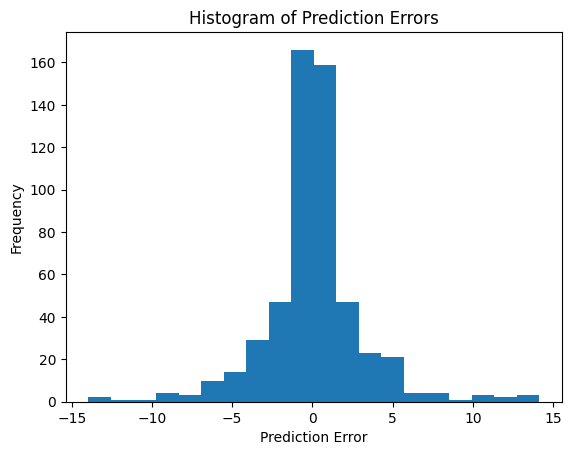

In [31]:
# Calculate statistical measures for the target variable
mean_life_expectancy = ytrain.mean()
std_dev_life_expectancy = ytrain.std()
print(f"Mean Life Expectancy: {mean_life_expectancy}")
print(f"Standard Deviation of Life Expectancy: {std_dev_life_expectancy}")

# Comparison of RMSE and MAE with these statistics
print(f"RMSE is {'low' if rmse_val < std_dev_life_expectancy else 'high'} compared to the standard deviation of the target variable.")
print(f"MAE is {'low' if mae_val < std_dev_life_expectancy else 'high'} compared to the standard deviation of the target variable.")

# Visualisation
errors = yval_pred - yval
plt.hist(errors, bins=20)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.show()


- The model predicts accurately on average, but there is a small bias in the errors.
- The RMSE and MAE metrics are below the standard deviation of the target variable, suggesting that the model predicts better than a simple guess of the mean.
- The non-symmetric distribution of errors may indicate that the model systematically underestimates or overestimates life expectancy.
> In order to improve the predictions of the model, I will perform hyperparameter analysis to optimise them.

## Tuning hyperparameters

In [32]:
param_grid = {
    'n_estimators': list(range(10, 55, 5)) + list(range(50, 201, 25)),
    'max_samples': np.round(np.arange(0.5, 1.01, 0.05).tolist(), 2),
    'max_depth': range(1, 16),
    'max_features': ['sqrt', 'log2', None]
}
param_comb = ParameterGrid(param_grid)

> I chose a range of n_estimators from 10 to 200 to assess the effect of the number of trees on the accuracy and stability of the model. The parameter max_samples ranges from 50% to 100% of the dataset to test the effect of bootstrapping subsamples on generalisability. Tree depth max_depth from a range of 1 to 15 allows us to see the balance between undertraining and overtraining. The max_features options include sqrt, log2 and None, which provides an opportunity to investigate the effect of the number of features used in the construction of each node on model performance.

In [33]:
val_metric = []
train_metric = []

for params in param_comb:
    crf = CustomRandomForest(n_estimators=params['n_estimators'], max_samples=params['max_samples'], max_depth=params['max_depth'], max_features = params['max_features'])
    crf.fit(Xtrain, ytrain)
    train_metric.append(mean_squared_error(ytrain, crf.predict(Xtrain), squared = False))
    val_metric.append(mean_squared_error(yval, crf.predict(Xval), squared = False))

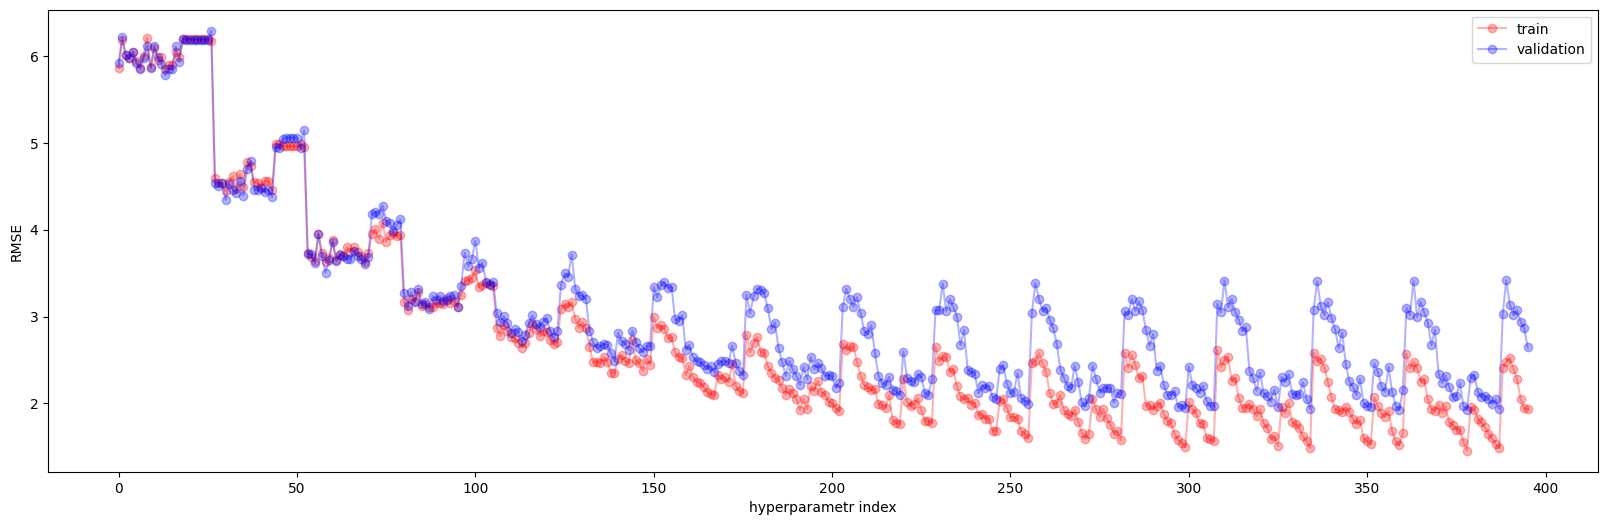

In [34]:
# Visualisation of results
step = 20

plt.figure(figsize=(20,6))
plt.plot(train_metric[::step], 'or-', alpha=0.3)
plt.plot(val_metric[::step], 'ob-', alpha=0.3)
plt.xlabel('hyperparametr index')
plt.ylabel('RMSE')
plt.legend(['train', 'validation'])
plt.show()

## Best RandomForest

In [35]:
# Selection of the best hyperparameters based on validation data
best_params = param_comb[np.argmin(val_metric)]
best_params

{'n_estimators': 150,
 'max_samples': 1.0,
 'max_features': 'log2',
 'max_depth': 15}

> We got an interesting result. max_samples: 1.0 - Each tree uses the entire available dataset for training. this may mean that diversifying subsamples (bootstrap) does not significantly improve the model for our particular dataset. the maximum depth of each tree of 15 levels allows the model to explore the data in sufficient depth and identify complex patterns. However, this depth can also encourage overtraining, probably compensated for by the number of trees and limiting the number of features.

In [36]:
# Training a random forest with the best hyperparameters
best_forest = CustomRandomForest(n_estimators=best_params['n_estimators'], max_samples=best_params['max_samples'], max_depth=best_params['max_depth'], max_features = best_params['max_features'])
best_forest.fit(Xtrain, ytrain)

In [38]:
def plot_errors(model):
    '''plots errors histogram and box plot'''
    
    errors = model.predict(Xval) - yval
    plt.figure(figsize=(10, 12))
    
    # Error histogram
    plt.subplot(2, 1, 1)
    plt.hist(errors, bins=20)
    plt.xlabel('Prediction Error')
    plt.ylabel('Frequency')
    plt.title('Histogram of Prediction Errors')
    
    # Box plot of errors
    plt.subplot(2, 1, 2)
    boxprops = dict(linestyle='-', linewidth=2, color='darkgoldenrod')
    flierprops = dict(marker='o', color='green', markersize=8)
    medianprops = dict(linestyle='-', linewidth=2, color='firebrick')
    meanlineprops = dict(linestyle='--', linewidth=2, color='purple')
    
    plt.boxplot(errors, vert=False, boxprops=boxprops, flierprops=flierprops,
                medianprops=medianprops, meanprops=meanlineprops, showmeans=True)
    plt.xlabel('Prediction Error')
    plt.title('Boxplot of Prediction Errors')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

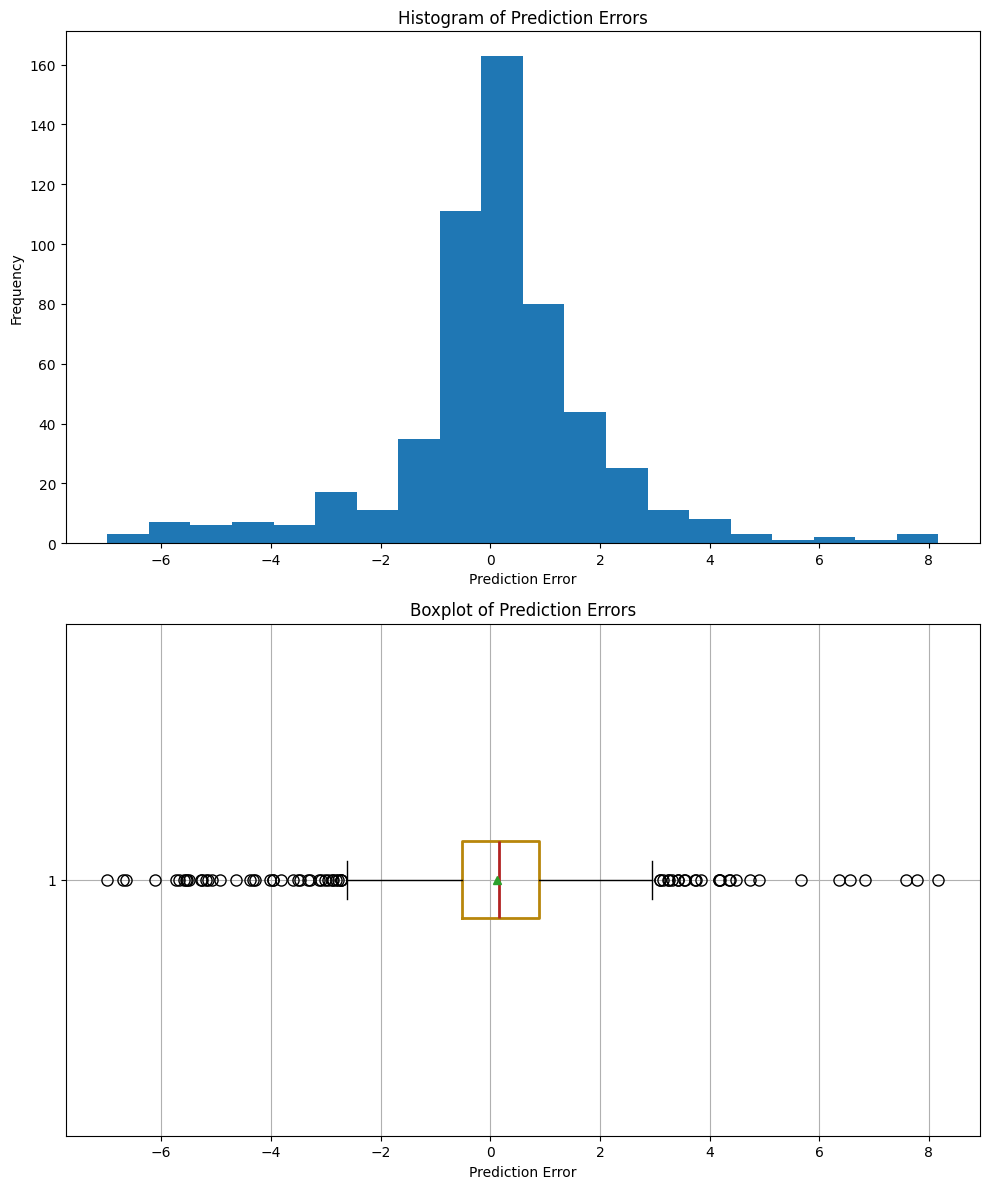

In [39]:
plot_errors(best_forest)

In [40]:
def scatter_plot(model):
    '''Create a scatter plot'''
    plt.scatter(yval, model.predict(Xval))
    
    # Determine the minimum and maximum values for the line y = x
    min_val = min(yval.min(), model.predict(Xval).min())
    max_val = max(yval.max(), model.predict(Xval).max())
    
    # Drawing the line y = x
    plt.plot([min_val, max_val], [min_val, max_val], 'r')
    
    # Set up the labels and title of the plot
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.title('Scatter plot of true and predicted values')
    plt.show()

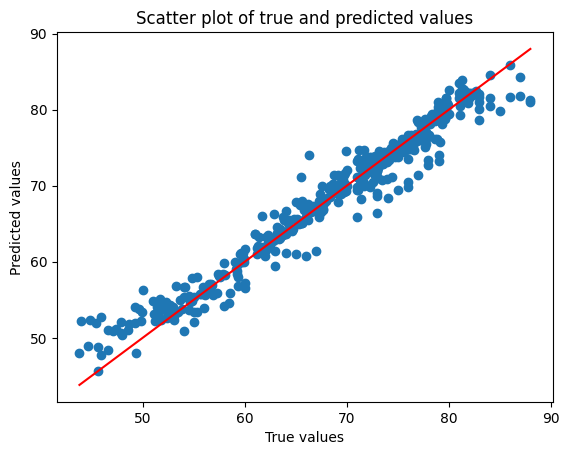

In [41]:
scatter_plot(best_forest)

> The graphs show that errors are concentrated near 0, large errors are few, points are concentrated near the line x=y, which is pleasing

In [46]:
rmse = mean_squared_error(yval, best_forest.predict(Xval), squared = False)
mae = mean_absolute_error(yval, best_forest.predict(Xval))
print(f"Validation RMSE: {rmse}")
print(f"Validation MAE: {mae}")

Validation RMSE: 1.9231770994699644
Validation MAE: 1.260166640175311


> The model has achieved a Validation RMSE of 1.923 years and a Validation MAE of 1.260 years. These metrics indicate a high level of prediction accuracy, with the model’s predictions deviating from actual life expectancy values by less than two years on average. The lower value of MAE compared to RMSE suggests that there are not many large errors skewing the model's performance, and the model is consistent in its predictive accuracy across the validation dataset.

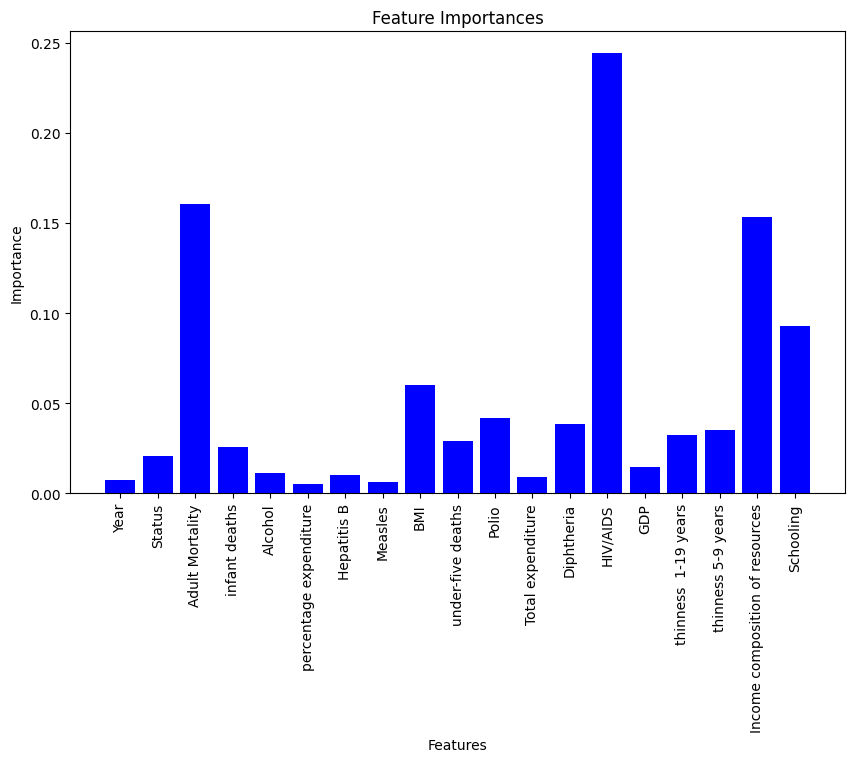

In [42]:
# get features
feature_importances = best_forest.feature_importances_()

feature_names = Xval.columns.tolist()  # Получаем список всех столбцов

# Visialisation
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances, color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.show()

> on the graph you can see which attributes are decisive in predicting

# AdaBoost

> AdaBoost is suitable for our life expectancy prediction task as it combines multiple simple models to improve predictive performance. It is adaptive in its learning, meaning it focuses iteratively on the observations that previous models found challenging, enhancing its ability to deal with complex patterns and variances in the data. This property could be especially beneficial given the likely presence of non-linear relationships and interactions between demographic and health indicators in our dataset.

In [35]:
# an example
ada_reg = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=50,
    learning_rate=1,
    random_state=42
)

In [36]:
ada_reg.fit(Xtrain, ytrain)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3), learning_rate=1,
                  random_state=42)

In [37]:
rmse_train = mean_squared_error(ytrain, ada_reg.predict(Xtrain), squared = False)
mae_train = mean_absolute_error(ytrain, ada_reg.predict(Xtrain))
rmse_val = mean_squared_error(yval, ada_reg.predict(Xval), squared=False)
mae_val = mean_absolute_error(yval, ada_reg.predict(Xval))

print(f"Train RMSE: {rmse_train}")
print(f"Train MAE: {mae_train}")
print()
print(f"Validation RMSE: {rmse_val}")
print(f"Validation MAE: {mae_val}")

Train RMSE: 2.980021963401059
Train MAE: 2.4416551737707612

Validation RMSE: 3.212906106625348
Validation MAE: 2.5401621047673135


>similarly to the random forest, we see that even with basic parameters the model can make better predictions than just guessing the mean value.

## Tuning model

In [48]:
param_grid = {
    'n_estimators': list(range(10, 35, 5)) + list(range(30, 210, 10)),
    'max_depth': range(2, 7),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1]
}
param_comb = ParameterGrid(param_grid)

> To adjust the hyperparameters of the AdaBoost model, I chose a range of n_estimators from 10 to 200 to evaluate the impact of the number of weak training models on ensemble performance. I started with a finer step of 5 for smaller values to investigate their impact in detail, and increased the step to 10 for a wider range to balance detailed investigation and computational efficiency. For max_depth, I used a range of 2 to 6, assuming that simpler models would reduce the risk of overtraining and speed up learning. The learning_rate parameter was chosen to range from 0.01 to 1 to explore how different degrees of contribution from each model affect learning, from a very cautious to a more aggressive approach."

In [49]:
val_metric = []
train_metric = []
for params in param_comb:
    dt_depth = params.pop("max_depth")
    params["estimator"] = DecisionTreeRegressor(max_depth = dt_depth)
    dt = AdaBoostRegressor(**params, random_state = 67).fit(Xtrain, ytrain)
    val_metric.append(mean_squared_error(yval, dt.predict(Xval), squared = False))
    train_metric.append(mean_squared_error(ytrain, dt.predict(Xtrain), squared = False))

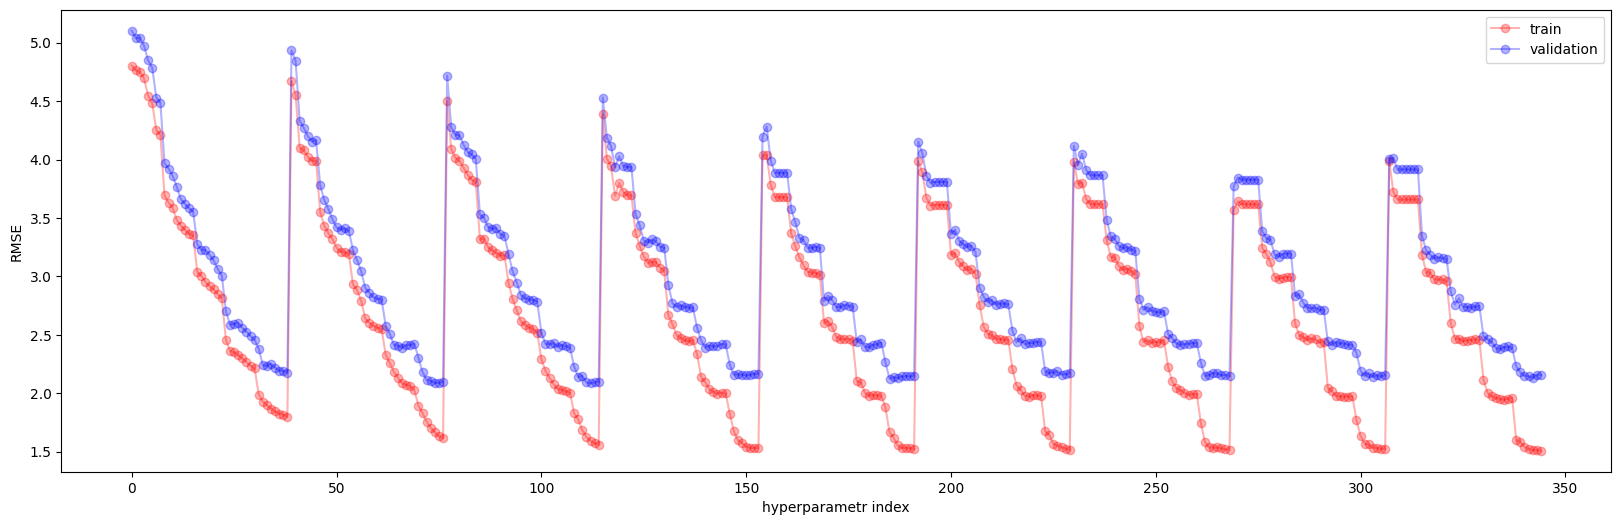

In [50]:
# Visualisation of results
step = 3

plt.figure(figsize=(20,6))
plt.plot(train_metric[::step], 'or-', alpha=0.3)
plt.plot(val_metric[::step], 'ob-', alpha=0.3)
plt.xlabel('hyperparametr index')
plt.ylabel('RMSE')
plt.legend(['train', 'validation'])
plt.show()

## Best AdaBoost

In [51]:
best_params = param_comb[np.argmin(val_metric)]
print(f"We found the best params {best_params}")

We found the best params {'n_estimators': 110, 'max_depth': 6, 'learning_rate': 0.1}


In [52]:
dt_depth = best_params.pop("max_depth")
best_params["estimator"] = DecisionTreeRegressor(max_depth = dt_depth)

In [53]:
best_AdaBoost = AdaBoostRegressor(
    **params,
    random_state=67
)
best_AdaBoost.fit(Xtrain, ytrain)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=6), learning_rate=1,
                  n_estimators=200, random_state=67)

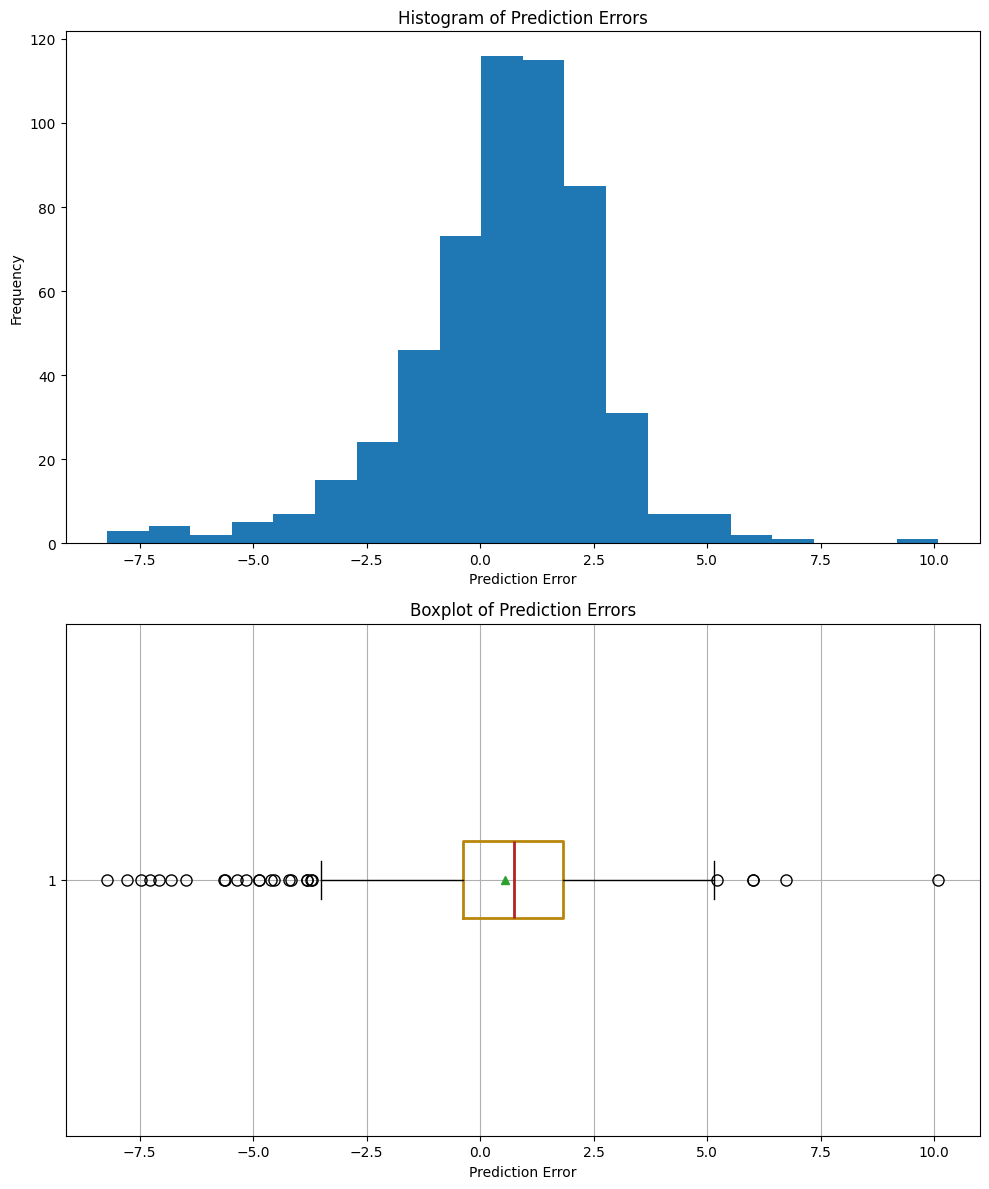

In [54]:
plot_errors(best_AdaBoost)

 - Most of the errors are centred around zero, indicating that the overall accuracy of the model is good. The absence of long tails in the distribution indicates that there are no extremely poor predictions.
 - The fact that the median is close to zero and that most of the data are within the IQR also confirms that the model on average makes accurate predictions. The presence of outliers may indicate certain cases where the model fails, perhaps due to noise in the data or unusual cases.

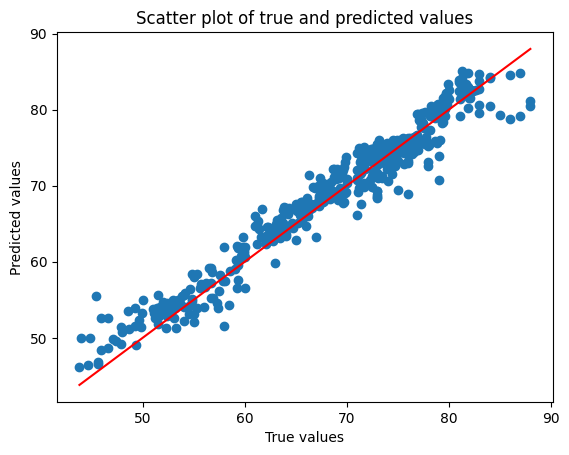

In [55]:
scatter_plot(best_AdaBoost)

- Overall we see clustering near the x = y line, which again is good

In [56]:
rmse = mean_squared_error(yval, best_AdaBoost.predict(Xval), squared = False)
mae = mean_absolute_error(yval, best_AdaBoost.predict(Xval))
print(f"Validation RMSE: {rmse}")
print(f"Validation MAE: {mae}")

Validation RMSE: 2.172488375594914
Validation MAE: 1.66314555039975


> The resulting RMSE value of 2.17 years indicates that the standard deviation of our model's errors from actual life expectancy values is about two years. This means that although the model may make some inaccurate predictions, overall it predicts life expectancy with relatively little deviation. The MAE value of 1.66 years suggests that, on average, the absolute error of our predictions is also within two years. This confirms that the model produces close to reality estimates in most cases .

# Ridge Regression

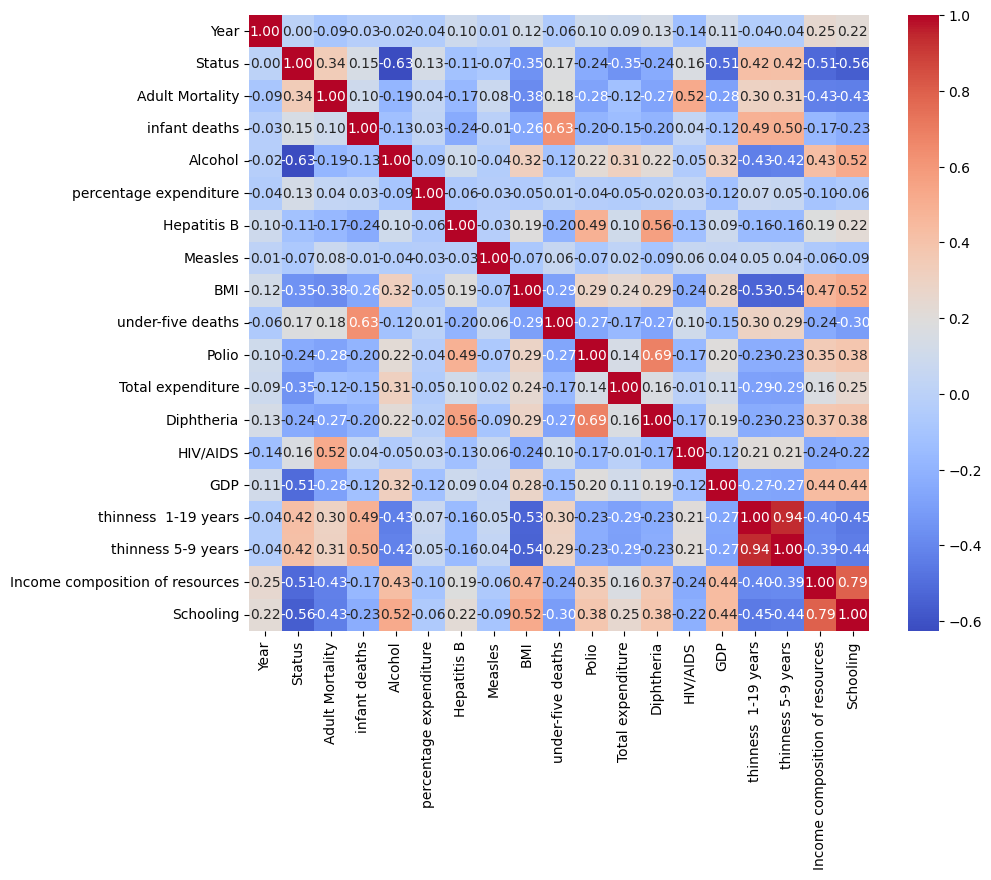

In [57]:
# Calculate the correlation matrix
df = pd.concat([Xval, Xtrain, Xtest], ignore_index=True)
corr_matrix = df.corr()

# Visualisation using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

- Some attributes are highly correlated with each other. For example, if "Schooling" and "Income composition of resources" have high correlation coefficients, this could indicate that the level of education in a country is related to its economic development.
- The choice of ridge regression for our analysis seems reasonable based on the observed multicollinearity in the data. This should help provide more reliable predictions and improve the generalisability of the model by reducing potential overfitting on correlated features.

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [59]:
# Standardisation of the training dataset
Xtrain_scaled = scaler.fit_transform(Xtrain)

# Standardisation of the validation dataset
# It is important to use the mean and standard deviation parameters from the training set
Xval_scaled = scaler.transform(Xval)

In [60]:
# an example
ridge = Ridge(alpha=1)
ridge.fit(Xtrain_scaled, ytrain)

Ridge(alpha=1)

In [61]:
yval_pred = ridge.predict(Xval_scaled)

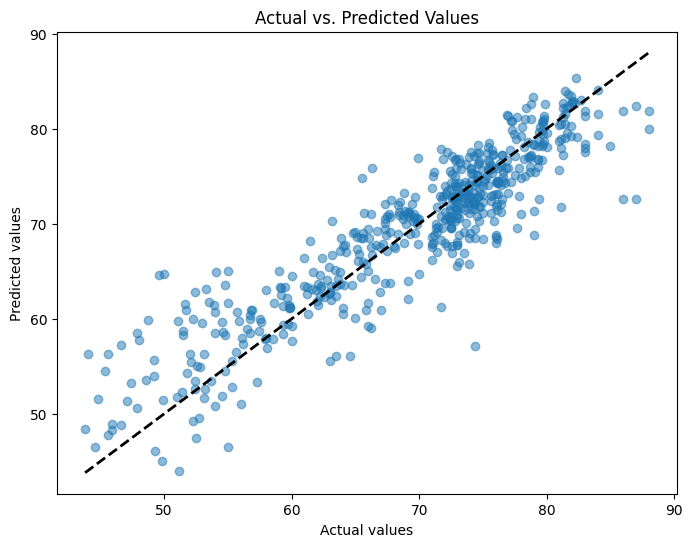

In [62]:
# scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(yval, yval_pred, alpha=0.5)  # alpha устанавливает прозрачность точек

plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.title('Actual vs. Predicted Values')

plt.plot([yval.min(), yval.max()], [yval.min(), yval.max()], 'k--', lw=2)

plt.show()

In [63]:
rmse = mean_squared_error(yval, ridge.predict(Xval_scaled), squared = False)
mae = mean_absolute_error(yval, ridge.predict(Xval_scaled))
print(f"Validation RMSE: {rmse}")
print(f"Validation MAE: {mae}")

Validation RMSE: 3.9710395966599945
Validation MAE: 2.9559893255936043


- there's a wide variation from the true values, I'll try to fix it.

## Tuning model

In [64]:
# the code was taken from cvičení 08 notebook
from scipy import optimize
#-----------------------------------------------------------------------------------------------------------------
def get_opt_ridge_model(Xtrain, Xval, ytrain, yval):
    def ridgemodel_eval(alpha):
        clf = Ridge(alpha=alpha)
        clf.fit(Xtrain, ytrain)
        return mean_squared_error(yval, clf.predict(Xval), squared = False)

    alphas = np.linspace(1,500,250)
    alphas_res = [ridgemodel_eval(alpha) for alpha in alphas]
    plt.plot(alphas, alphas_res, '.')
    plt.show()

    # Find Ridge alpha automatically
    opt_alpha = optimize.minimize_scalar(ridgemodel_eval, options = {'maxiter': 100}, method = 'bounded', bounds=(0.1, 400))
    print('Optimal alpha', opt_alpha)
    print("\n")

    clf_opt_ridge = Ridge(alpha = opt_alpha.x)
    clf_opt_ridge.fit(Xtrain, ytrain)
    return clf_opt_ridge

#-----------------------------------------------------------------------------------------------------------------

In [65]:
from sklearn.preprocessing import MinMaxScaler

def get_opt_ridge_model_minmax(Xtrain, Xval, ytrain, yval):
    # MinMaxScaler
    scaler = MinMaxScaler()
    
    # Standardisation
    Xtrain_scaled = scaler.fit_transform(Xtrain)
    Xval_scaled = scaler.transform(Xval)
    
    return get_opt_ridge_model(Xtrain_scaled, Xval_scaled, ytrain, yval)

In [66]:
def get_opt_ridge_model_standart(Xtrain, Xval, ytrain, yval):
    # Инициализируем StandardScaler
    scaler = StandardScaler()
    
    # Standardisation
    Xtrain_scaled = scaler.fit_transform(Xtrain)
    Xval_scaled = scaler.transform(Xval)
    
    return get_opt_ridge_model(Xtrain_scaled, Xval_scaled, ytrain, yval)

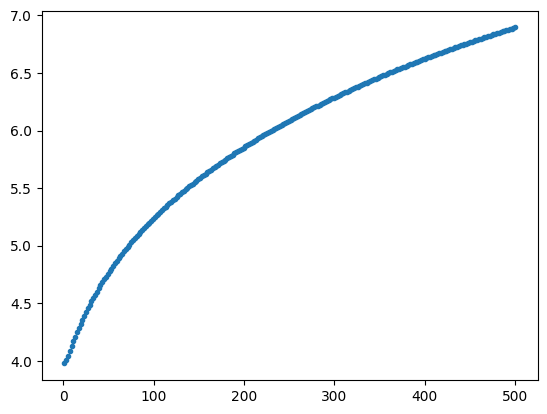

Optimal alpha  message: Solution found.
 success: True
  status: 0
     fun: 3.9714132926425
       x: 0.10000406819977517
     nit: 38
    nfev: 38


Validační RMSE s MinMaxScaler: 3.97141
Validační MAE s MinMaxScaler: 2.95612


In [68]:
# Get the optimal Ridge model with MinMaxScaler
# MinMaxScaler
scaler = MinMaxScaler()

# Standardisation
Xtrain_scaled_minmax = scaler.fit_transform(Xtrain)
Xval_scaled_minmax = scaler.transform(Xval)

clf_opt_ridge_minmax = get_opt_ridge_model_minmax(Xtrain, Xval, ytrain, yval)
RMSE_val = mean_squared_error(yval, clf_opt_ridge_minmax.predict(Xval_scaled_minmax), squared = False)
MAE_val = mean_absolute_error(yval, clf_opt_ridge_minmax.predict(Xval_scaled_minmax))
print(f'Validační RMSE s MinMaxScaler: {RMSE_val:.5f}')
print(f'Validační MAE s MinMaxScaler: {MAE_val:.5f}')

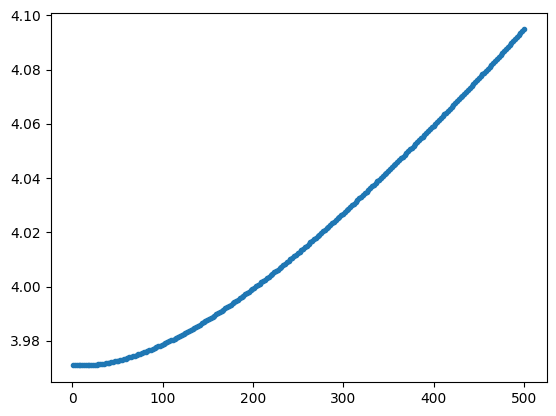

Optimal alpha  message: Solution found.
 success: True
  status: 0
     fun: 3.9709471592040617
       x: 9.710212204518557
     nit: 15
    nfev: 15


Validační RMSE s StandardScaler: 3.97095
Validační MAE s StandardScaler: 2.95589


In [69]:
# Get the optimal Ridge model with StandardScaler
clf_opt_ridge_std = get_opt_ridge_model_standart(Xtrain, Xval, ytrain, yval)
RMSE_val = mean_squared_error(yval, clf_opt_ridge_std.predict(Xval_scaled), squared = False)
MAE_val = mean_absolute_error(yval, clf_opt_ridge_std.predict(Xval_scaled))
print(f'Validační RMSE s StandardScaler: {RMSE_val:.5f}')
print(f'Validační MAE s StandardScaler: {MAE_val:.5f}')

The obtained RMSE value of about 3.97 for the Ridge Regression model using MinMaxScaler/StandardScaler indicates that the RMSE of the prediction error is about 4 years. The optimal value of the regularisation parameter alpha is close to zero, indicating that for this data set regularisation is almost unnecessary and the basic linear regression model may have been sufficient. Multicollinearity may have been in variables that had only a small effect on prediction. 

# Best of the bests

The best model in relation to RMSE turned out to be a random forest. 

In [71]:
best_model = best_forest

In [72]:
rmse = mean_squared_error(ytest, best_model.predict(Xtest), squared = False)
mae = mean_absolute_error(ytest, best_model.predict(Xtest))
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")

Test RMSE: 2.0920372132261043
Test MAE: 1.378380136351323


> The test RMSE for this model is 2.09 years and the MAE is 1.38 years, indicating that on average the model predicts life expectancy with a deviation of approximately two years from actual values. These RMSE and MAE values on the test data can be used as an estimate of the error we can expect on new, unseen data.

In [74]:
all_X = pd.concat([Xval, Xtrain, Xtest], ignore_index=True)
all_y = pd.concat([yval, ytrain, ytest], ignore_index=True)

In [75]:
# train best model on all data
best_model.fit(all_X, all_y)

In [101]:
# save the countries and years before deleting the 'Country' column
countries = eval['Country']
years = eval['Year']

# remove the 'Country' column - it was not used in the model.
X_eval = eval.drop('Country', axis=1)

In [103]:
# predict life expectancy
predicted_life_expectancy = best_model.predict(X_eval)

# сreate a DataFrame with the results
results = pd.DataFrame({
    'Country': countries,
    'Year': years,
    'Life expectancy': predicted_life_expectancy
})

In [104]:
# results to a CSV file
results.to_csv('results.csv', index=False)

# Bonus

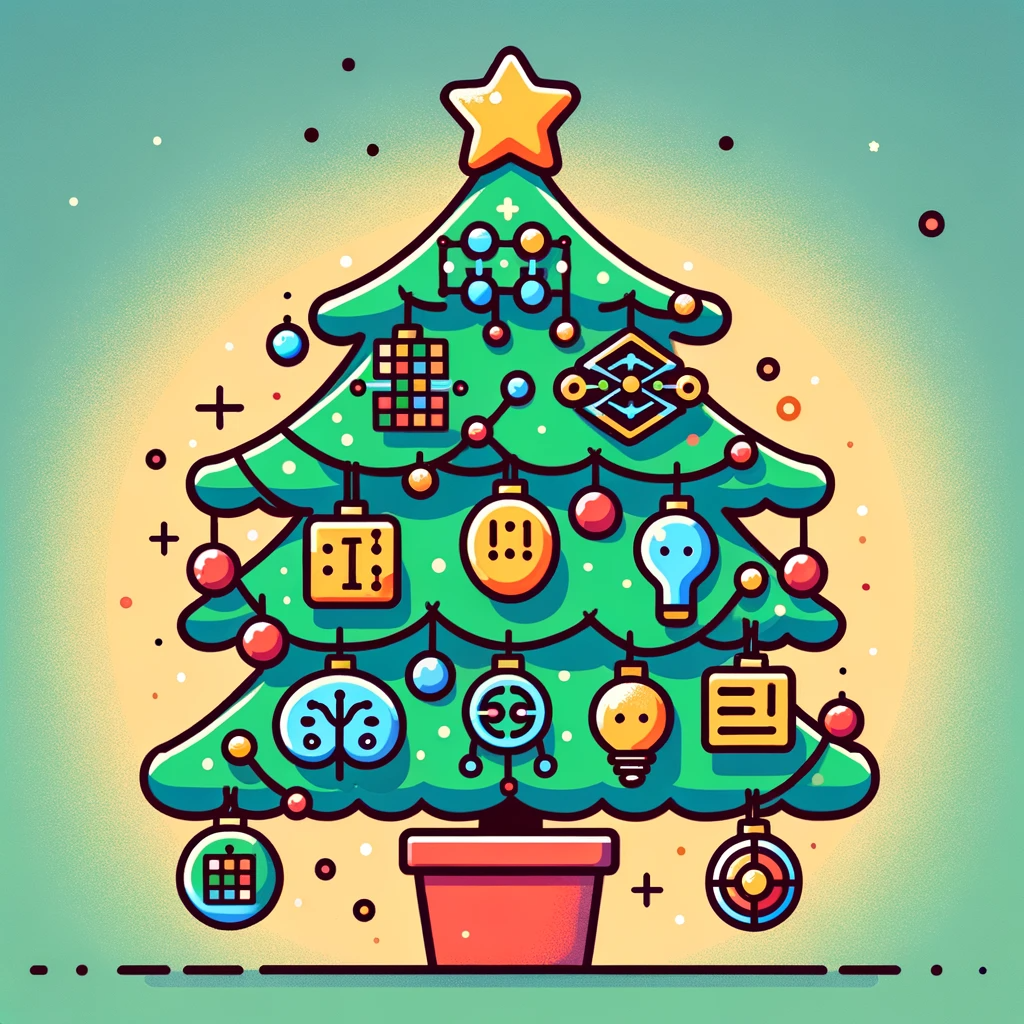

In [1]:
from IPython.display import Image

image_path = 'bonus.png' # generated by Chat GPT - DALL E
Image(filename=image_path, width=400, height=400)

Děkuji a přeji hodně štěstí v novém roce